In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
cancer = pd.read_csv('data/cancer.csv')
boston = pd.read_csv('data/boston.csv')

In [4]:
y = cancer['type']
X = cancer.values[:, 1:].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
def 모델평가(모델, X_train, X_test, y_train, y_test):
    모델.fit(X_train, y_train)
    훈련점수 = 모델.score(X_train, y_train)
    시험점수 = 모델.score(X_test, y_test)
    return 훈련점수, 시험점수

eval_model = 모델평가

In [6]:
gbrt_clf = GradientBoostingClassifier()
eval_model(gbrt_clf, X_train, X_test, y_train, y_test)

(1.0, 0.965034965034965)

In [7]:
gbrt_clf = GradientBoostingClassifier(max_depth=1)
eval_model(gbrt_clf, X_train, X_test, y_train, y_test)

(0.99530516431924887, 0.93706293706293708)

In [8]:
gbrt_clf = GradientBoostingClassifier(learning_rate=0.01)
eval_model(gbrt_clf, X_train, X_test, y_train, y_test)

(0.98826291079812212, 0.93006993006993011)

In [9]:
gbrt_clf = GradientBoostingClassifier(learning_rate=0.001)
eval_model(gbrt_clf, X_train, X_test, y_train, y_test)

(0.61971830985915488, 0.65034965034965031)

In [10]:
gbrt_clf = GradientBoostingClassifier(learning_rate=1.)
eval_model(gbrt_clf, X_train, X_test, y_train, y_test)

(1.0, 0.965034965034965)

In [11]:
gbrt_clf = GradientBoostingClassifier(learning_rate=10.)
eval_model(gbrt_clf, X_train, X_test, y_train, y_test)

(0.89906103286384975, 0.87412587412587417)

그리드 탐색을 활용한 모델 튜닝

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
param_grid = 변수_조합 = {
    'max_depth': [1, 2, 3, 4, 5],
    'learning_rate': [0.01, 0.1, 1., 10.]
}

In [14]:
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

In [15]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.1, 1.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
grid_search.best_params_

{'learning_rate': 1.0, 'max_depth': 4}

In [17]:
grid_search.best_score_

0.96948356807511737

In [18]:
best_model = grid_search.best_estimator_

In [19]:
eval_model(best_model, X_train, X_test, y_train, y_test)

(1.0, 0.93006993006993011)

## 교차 검증

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
iris = pd.read_csv('data/iris.data', header=None)

In [22]:
y = iris[4]
X = iris.values[:, :4].astype('float32')

In [23]:
gbrt_clf = GradientBoostingClassifier()

In [24]:
scores = cross_val_score(estimator=gbrt_clf, X=X, y=y)
scores

array([ 0.98039216,  0.92156863,  1.        ])

In [25]:
np.mean(scores)

0.9673202614379085

In [26]:
scores = cross_val_score(estimator=gbrt_clf, X=X, y=y, cv=5)
scores

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

In [27]:
np.mean(scores)

0.95999999999999996

# SVM

In [28]:
from sklearn.svm import SVC, SVR

In [29]:
y = cancer['type']
X = cancer.values[:, 1:].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
eval_model(SVC(), X_train, X_test, y_train, y_test)

(1.0, 0.67132867132867136)

In [31]:
cancer[:5]

,type,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


SVM은 단위에 민감합니다.

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler().fit(X_train)

In [34]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
X_train_scaled.min(), X_train_scaled.max()

(0.0, 1.0000001)

In [36]:
X_test_scaled.min(), X_test_scaled.max()

(-0.12020928, 1.3345578)

In [37]:
eval_model(SVC(kernel='linear'), 
           X_train_scaled, X_test_scaled, y_train, y_test)

(0.97652582159624413, 0.97902097902097907)

In [38]:
eval_model(SVC(kernel='rbf'), 
           X_train_scaled, X_test_scaled, y_train, y_test)

(0.95539906103286387, 0.95104895104895104)

In [39]:
y = boston['Price']
X = boston.values[:, 1:].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
eval_model(SVR(kernel='linear'), 
           X_train_scaled, X_test_scaled, y_train, y_test)

(0.62463333506143848, 0.51888431230587684)

In [42]:
eval_model(SVR(kernel='rbf'), 
           X_train_scaled, X_test_scaled, y_train, y_test)

(0.37875009390710057, 0.22709977242453561)

In [43]:
param_grid = {    
    'C': [0.001, 0.01, 0.1, 1., 10., 100],
    'gamma': [0.001, 0.01, 0.1, 1., 10., 100]
}

In [44]:
grid_search = GridSearchCV(
    estimator=SVR(kernel='rbf'), param_grid=param_grid, cv=5)

In [45]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100], 'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
grid_search.best_score_

0.80273561166488117

In [47]:
grid_search.best_params_

{'C': 100, 'gamma': 1.0}

In [48]:
best_model = grid_search.best_estimator_

In [49]:
best_model.score(X_test_scaled, y_test)

0.88175039924233789

# 신경망

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [53]:
y = cancer['type']
X = cancer.values[:, 1:].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [51]:
mlp_clf = MLPClassifier(hidden_layer_sizes=[10])

In [54]:
eval_model(mlp_clf, X_train, X_test, y_train, y_test)

(0.90375586854460099, 0.90909090909090906)

In [55]:
X.shape

(569, 30)

In [57]:
y = boston['Price']
X = boston.values[:, 1:].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [72]:
mlp_reg = MLPRegressor(
    hidden_layer_sizes=[40, 20], max_iter=400)
eval_model(mlp_reg, X_train, X_test, y_train, y_test)

(0.65199677818315771, 0.6021216293481636)

# 군집

In [73]:
from sklearn.datasets import make_blobs

In [74]:
X, y = make_blobs(random_state=1)

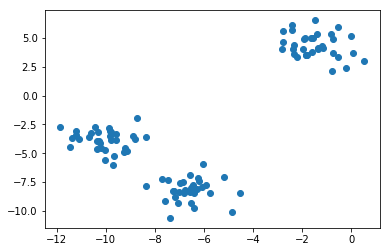

In [76]:
plt.scatter(X[:, 0], X[:, 1])

In [77]:
from sklearn.cluster import KMeans

In [79]:
kmeans = KMeans(n_clusters=3).fit(X)

In [80]:
y_pred = kmeans.predict(X)

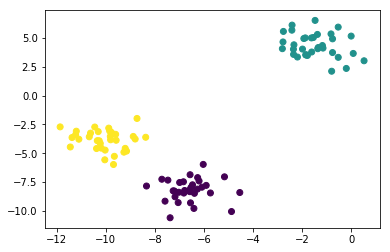

In [81]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

In [ ]:
y = y_pred

In [82]:
X2, y2 = make_blobs(n_samples=200, cluster_std=[1., 2.5, 0.5], 
                    random_state=170)

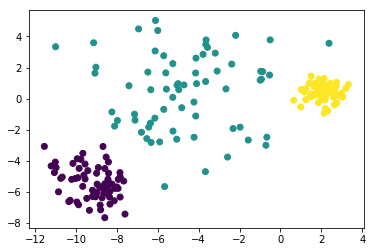

In [84]:
plt.scatter(X2[:, 0], X2[:, 1], c=y2)

In [85]:
kmeans = KMeans(n_clusters=3).fit(X2)

In [86]:
y_pred2 = kmeans.predict(X2)

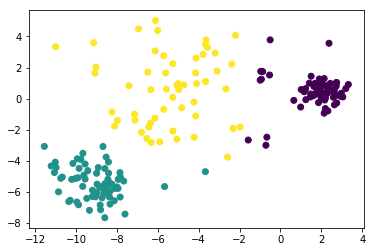

In [87]:
plt.scatter(X2[:, 0], X2[:, 1], c=y_pred2)

## DBSCAN

군집 개수를 지정할 필요가 없습니다.

In [88]:
from sklearn.datasets import make_moons

In [89]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

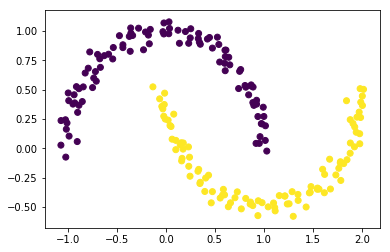

In [90]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [91]:
kmeans = KMeans(n_clusters=2).fit(X)
y_pred_km = kmeans.predict(X)

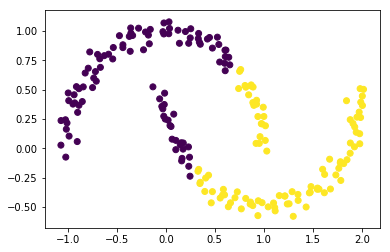

In [92]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred_km)

In [93]:
from sklearn.cluster import DBSCAN

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler().fit(X)
Xs = scaler.transform(X)

In [96]:
y_pred = DBSCAN().fit_predict(Xs)

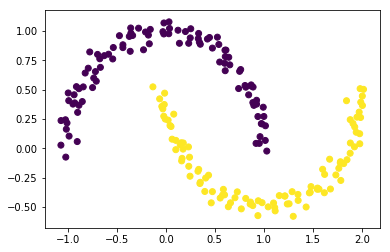

In [97]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

In [99]:
y_pred2 = DBSCAN(eps=0.2).fit_predict(Xs)

In [105]:
len(np.unique(y_pred2))

8

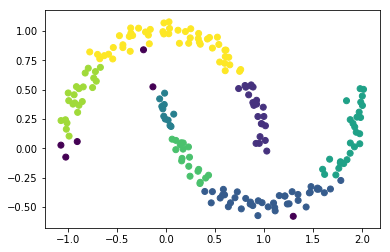

In [100]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred2)

In [101]:
y_pred3 = DBSCAN(eps=0.8).fit_predict(Xs)

In [103]:
np.unique(y_pred3)

array([0], dtype=int64)

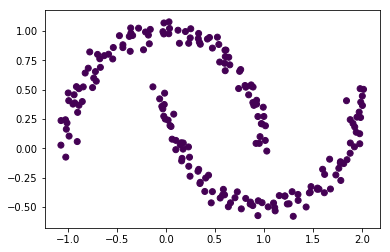

In [102]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred3)